In [3]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [4]:
cd /home/pimienta/Documents/repos/coding/vocalpy/scipy-proceedings-2023-vak

/home/pimienta/Documents/repos/coding/vocalpy/scipy-proceedings-2023-vak


In [5]:
def munge_df(df):  
    df['avg_err'] = (1.0 - df['avg_val_acc']) * 100
    df['avg_err_tfm'] = (1.0 - df['avg_val_acc_tfm']) * 100
    df['avg_segment_error_rate'] = df['avg_val_segment_error_rate'] * 100
    df['avg_segment_error_rate_tfm'] = df['avg_val_segment_error_rate_tfm'] * 100

    df_out = []

    for value_vars, value_name in zip(
        (
            ['avg_segment_error_rate', 'avg_segment_error_rate_tfm'],
            ['avg_err', 'avg_err_tfm'],
        ),
        (
            'Average Segment Error Rate', 'Average Error',
        )
        
    ):
        melted = pd.melt(df, id_vars=['train_set_dur', 'replicate_num', 'model_name'],
                         value_vars=value_vars,
                         var_name='postprocess',
                         value_name=value_name,
                        )
        post_process_map = dict(zip(value_vars, (False, True)))
        melted['postprocess'] = melted['postprocess'].map(post_process_map)
        df_out.append(melted)

    df_out = pd.merge(*df_out)
    return df_out

In [6]:
sns.set_context("talk")
sns.set(font_scale=1.5)


def plot_learncurve(df, bird_id):
    fig, ax_arr = plt.subplots(1, 2, figsize=(12, 7), dpi=300)

    for ax_ind, err_name in enumerate(('Average Error', 'Average Segment Error Rate')):
        ax = ax_arr[ax_ind]

        g = sns.lineplot(
            data=df,
            x='train_set_dur',
            y=err_name,
            hue='postprocess',
            palette='pastel',
            style='Input',
            ax=ax,
        )
        if ax_ind == 0:
            ax.legend().remove()
        else:
            sns.move_legend(ax, loc='upper right')

    for ax_ind, ylim in enumerate(([0, 4], [0, 25])):
        ax_arr[ax_ind].set_ylim(ylim)
    
    fig.suptitle(f'{bird_id}')
    fig.tight_layout()

In [7]:
RESULTS_ROOT = pathlib.Path('./results/Bengalese_Finches/learncurve/')

In [8]:
NET_NAMES_RESULTS_DIR_MAP = {
    'TweetyNet': 'results/BFSongRepo/all-birds/TweetyNet/results_230628_144709',
    'ED-TCN': 'results/BFSongRepo/all-birds/ED_TCN/results_230628_144655',
    #'TweetyNoLSTMNet': 'results/BFSongRepo/all-birds/TweetyNoLSTMNet/results_230705_120958'
}

In [9]:
data = []
for net_name, results_dir in NET_NAMES_RESULTS_DIR_MAP.items():
    results_dir = pathlib.Path(results_dir)
    csv_path = results_dir / 'learning_curve.csv'
    df = pd.read_csv(csv_path)
    df = df.rename(columns={'train_dur': 'train_set_dur'})
    df = munge_df(df)
    df.net_name = net_name
    data.append(df)

data = pd.concat(data)

/tmp/ipykernel_28633/3588409230.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.lineplot(
/tmp/ipykernel_28633/3588409230.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.lineplot(
/tmp/ipykernel_28633/3588409230.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.lineplot(
/tmp/ipykernel_28633/3588409230.py:8: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  g = sns.lineplot(


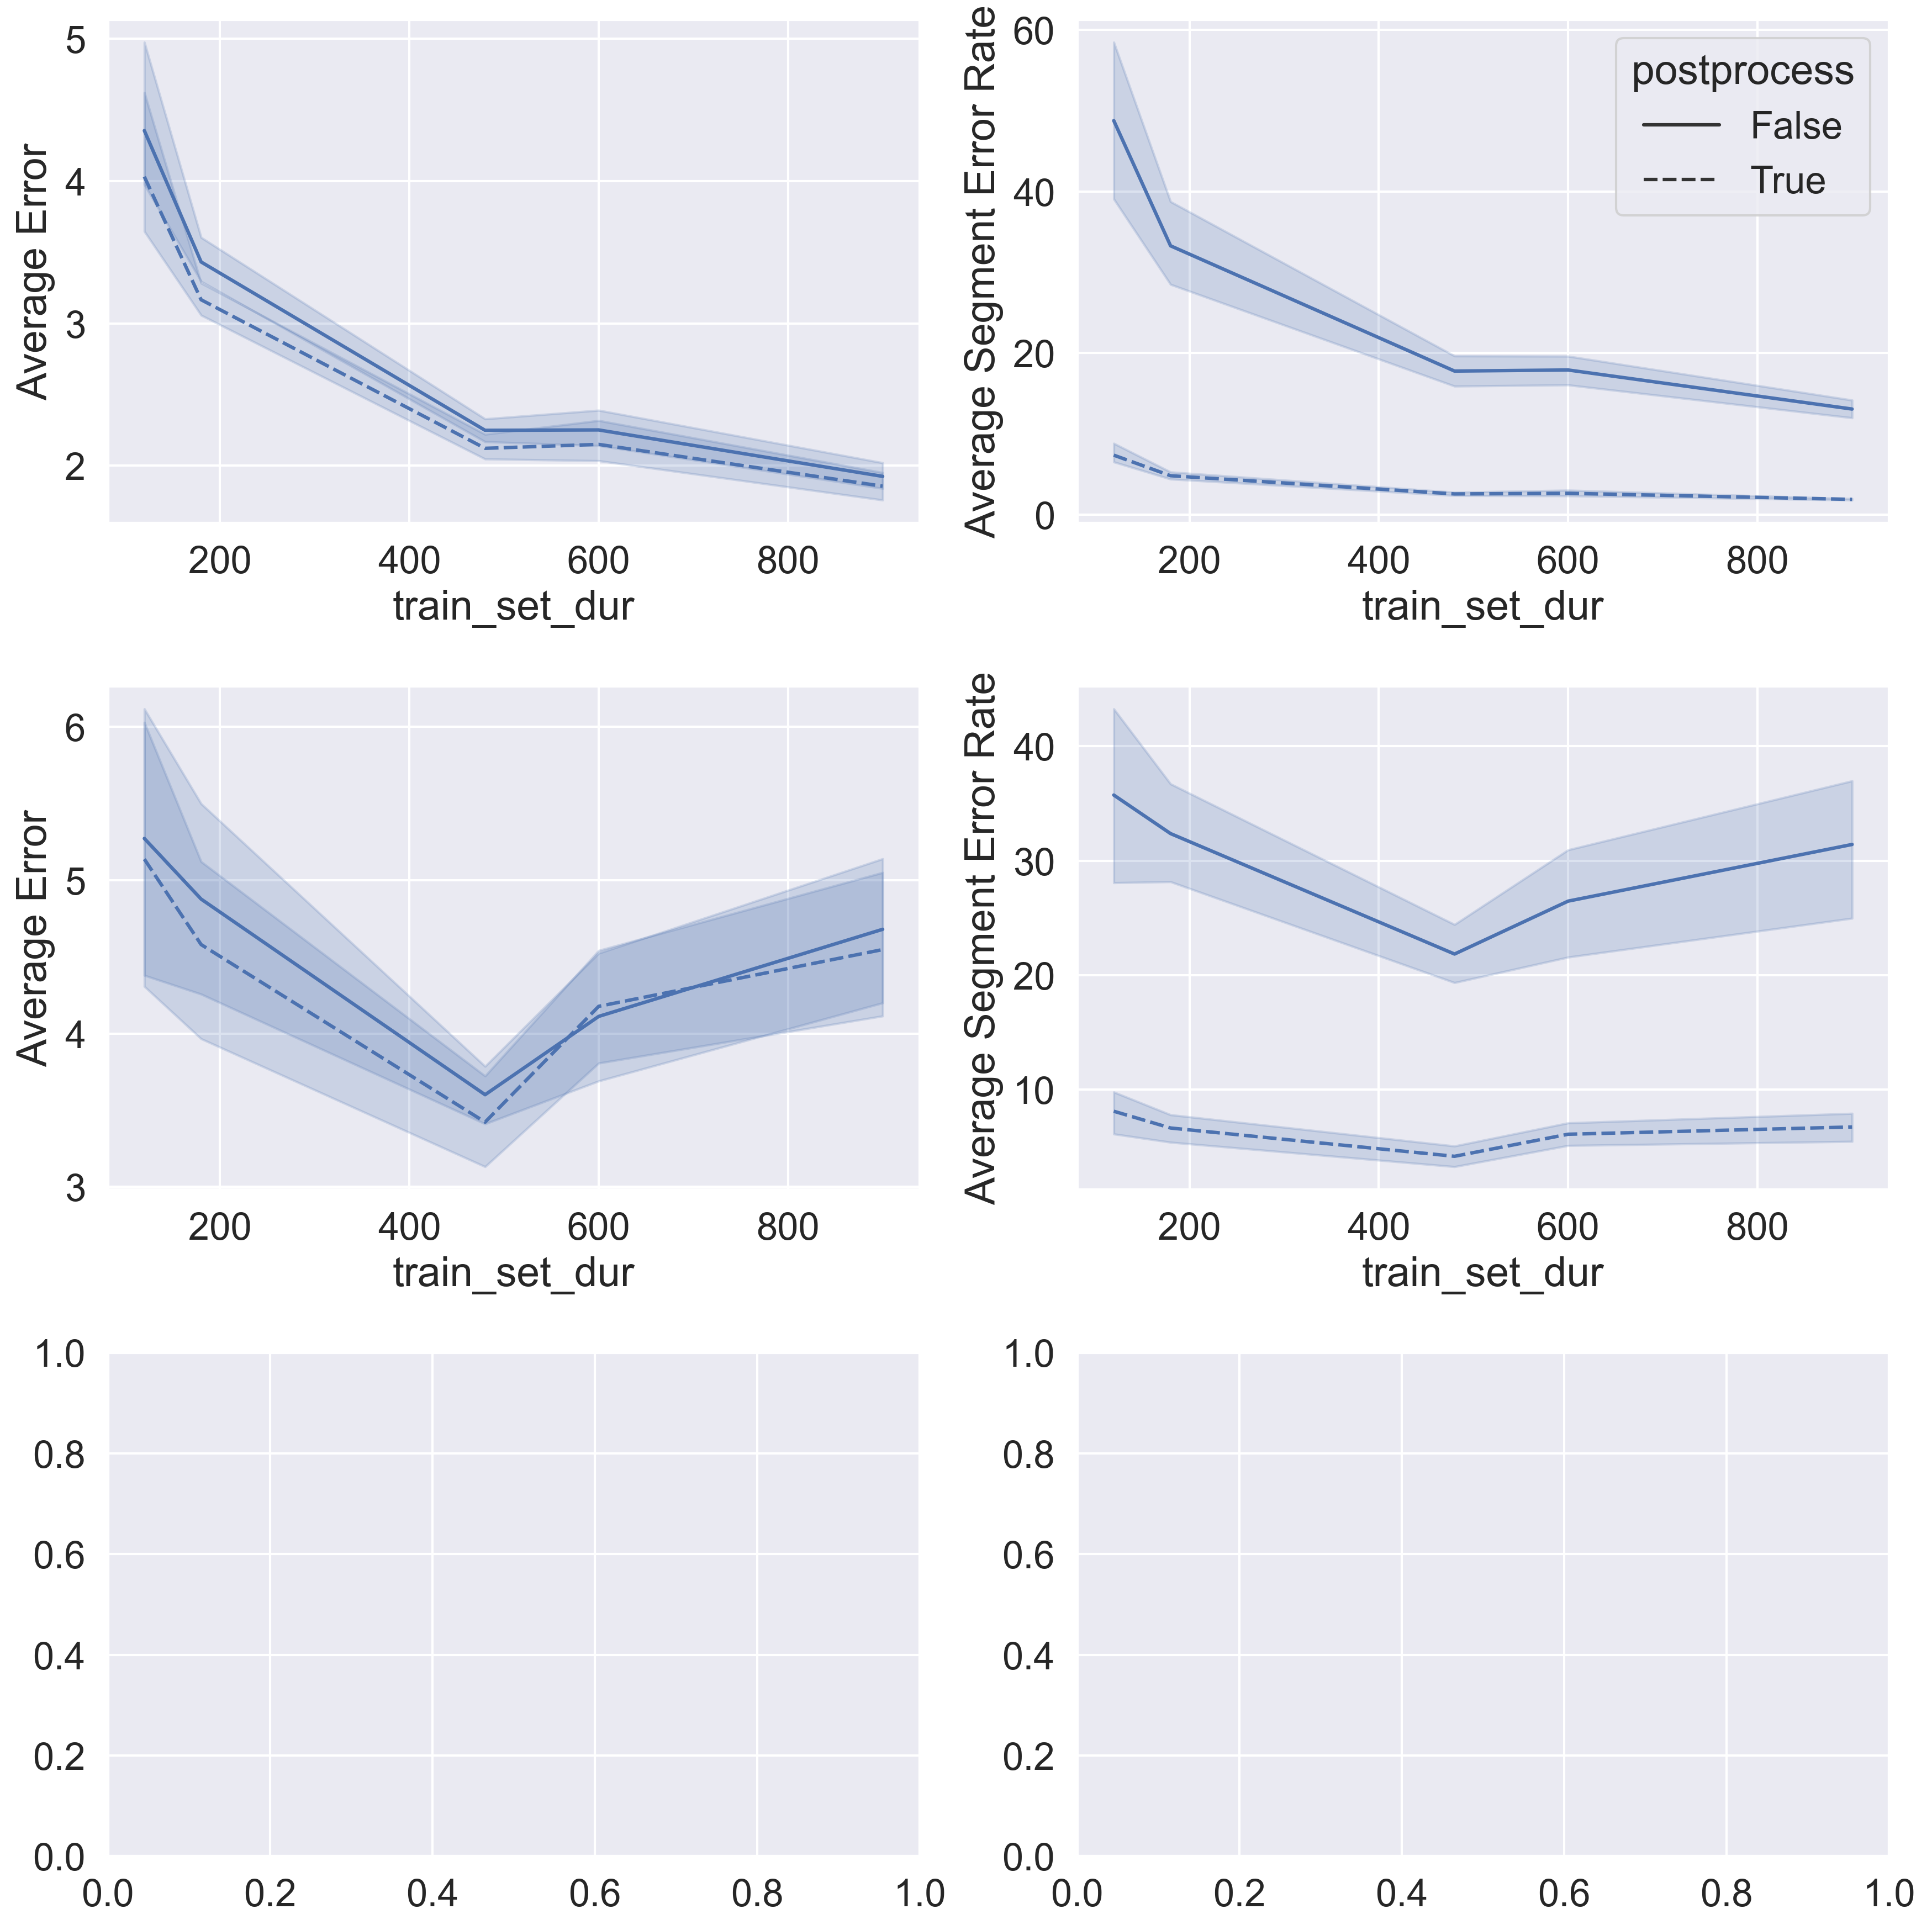

In [10]:
fig, ax_arr = plt.subplots(3, 2, figsize=(12, 12), dpi=300)

for row_ind, model_name in enumerate(data.model_name.unique()):
    data_model = data[data.model_name == model_name]
    
    for col_ind, err_name in enumerate(('Average Error', 'Average Segment Error Rate')):
        ax = ax_arr[row_ind, col_ind]    
        g = sns.lineplot(
            data=data_model,
            x='train_set_dur',
            y=err_name,
            style='postprocess',
            palette='pastel',
#            style='Input',
            ax=ax,
        )
        if row_ind == 0 and col_ind == 1:
            sns.move_legend(ax, loc='upper right')
        else:
            ax.legend().remove()      
    
    # for ax_ind, ylim in enumerate(([0, 4], [0, 25])):
    #     ax_arr[ax_ind].set_ylim(ylim)
    
# fig.suptitle(f'{bird_id}')
fig.tight_layout()

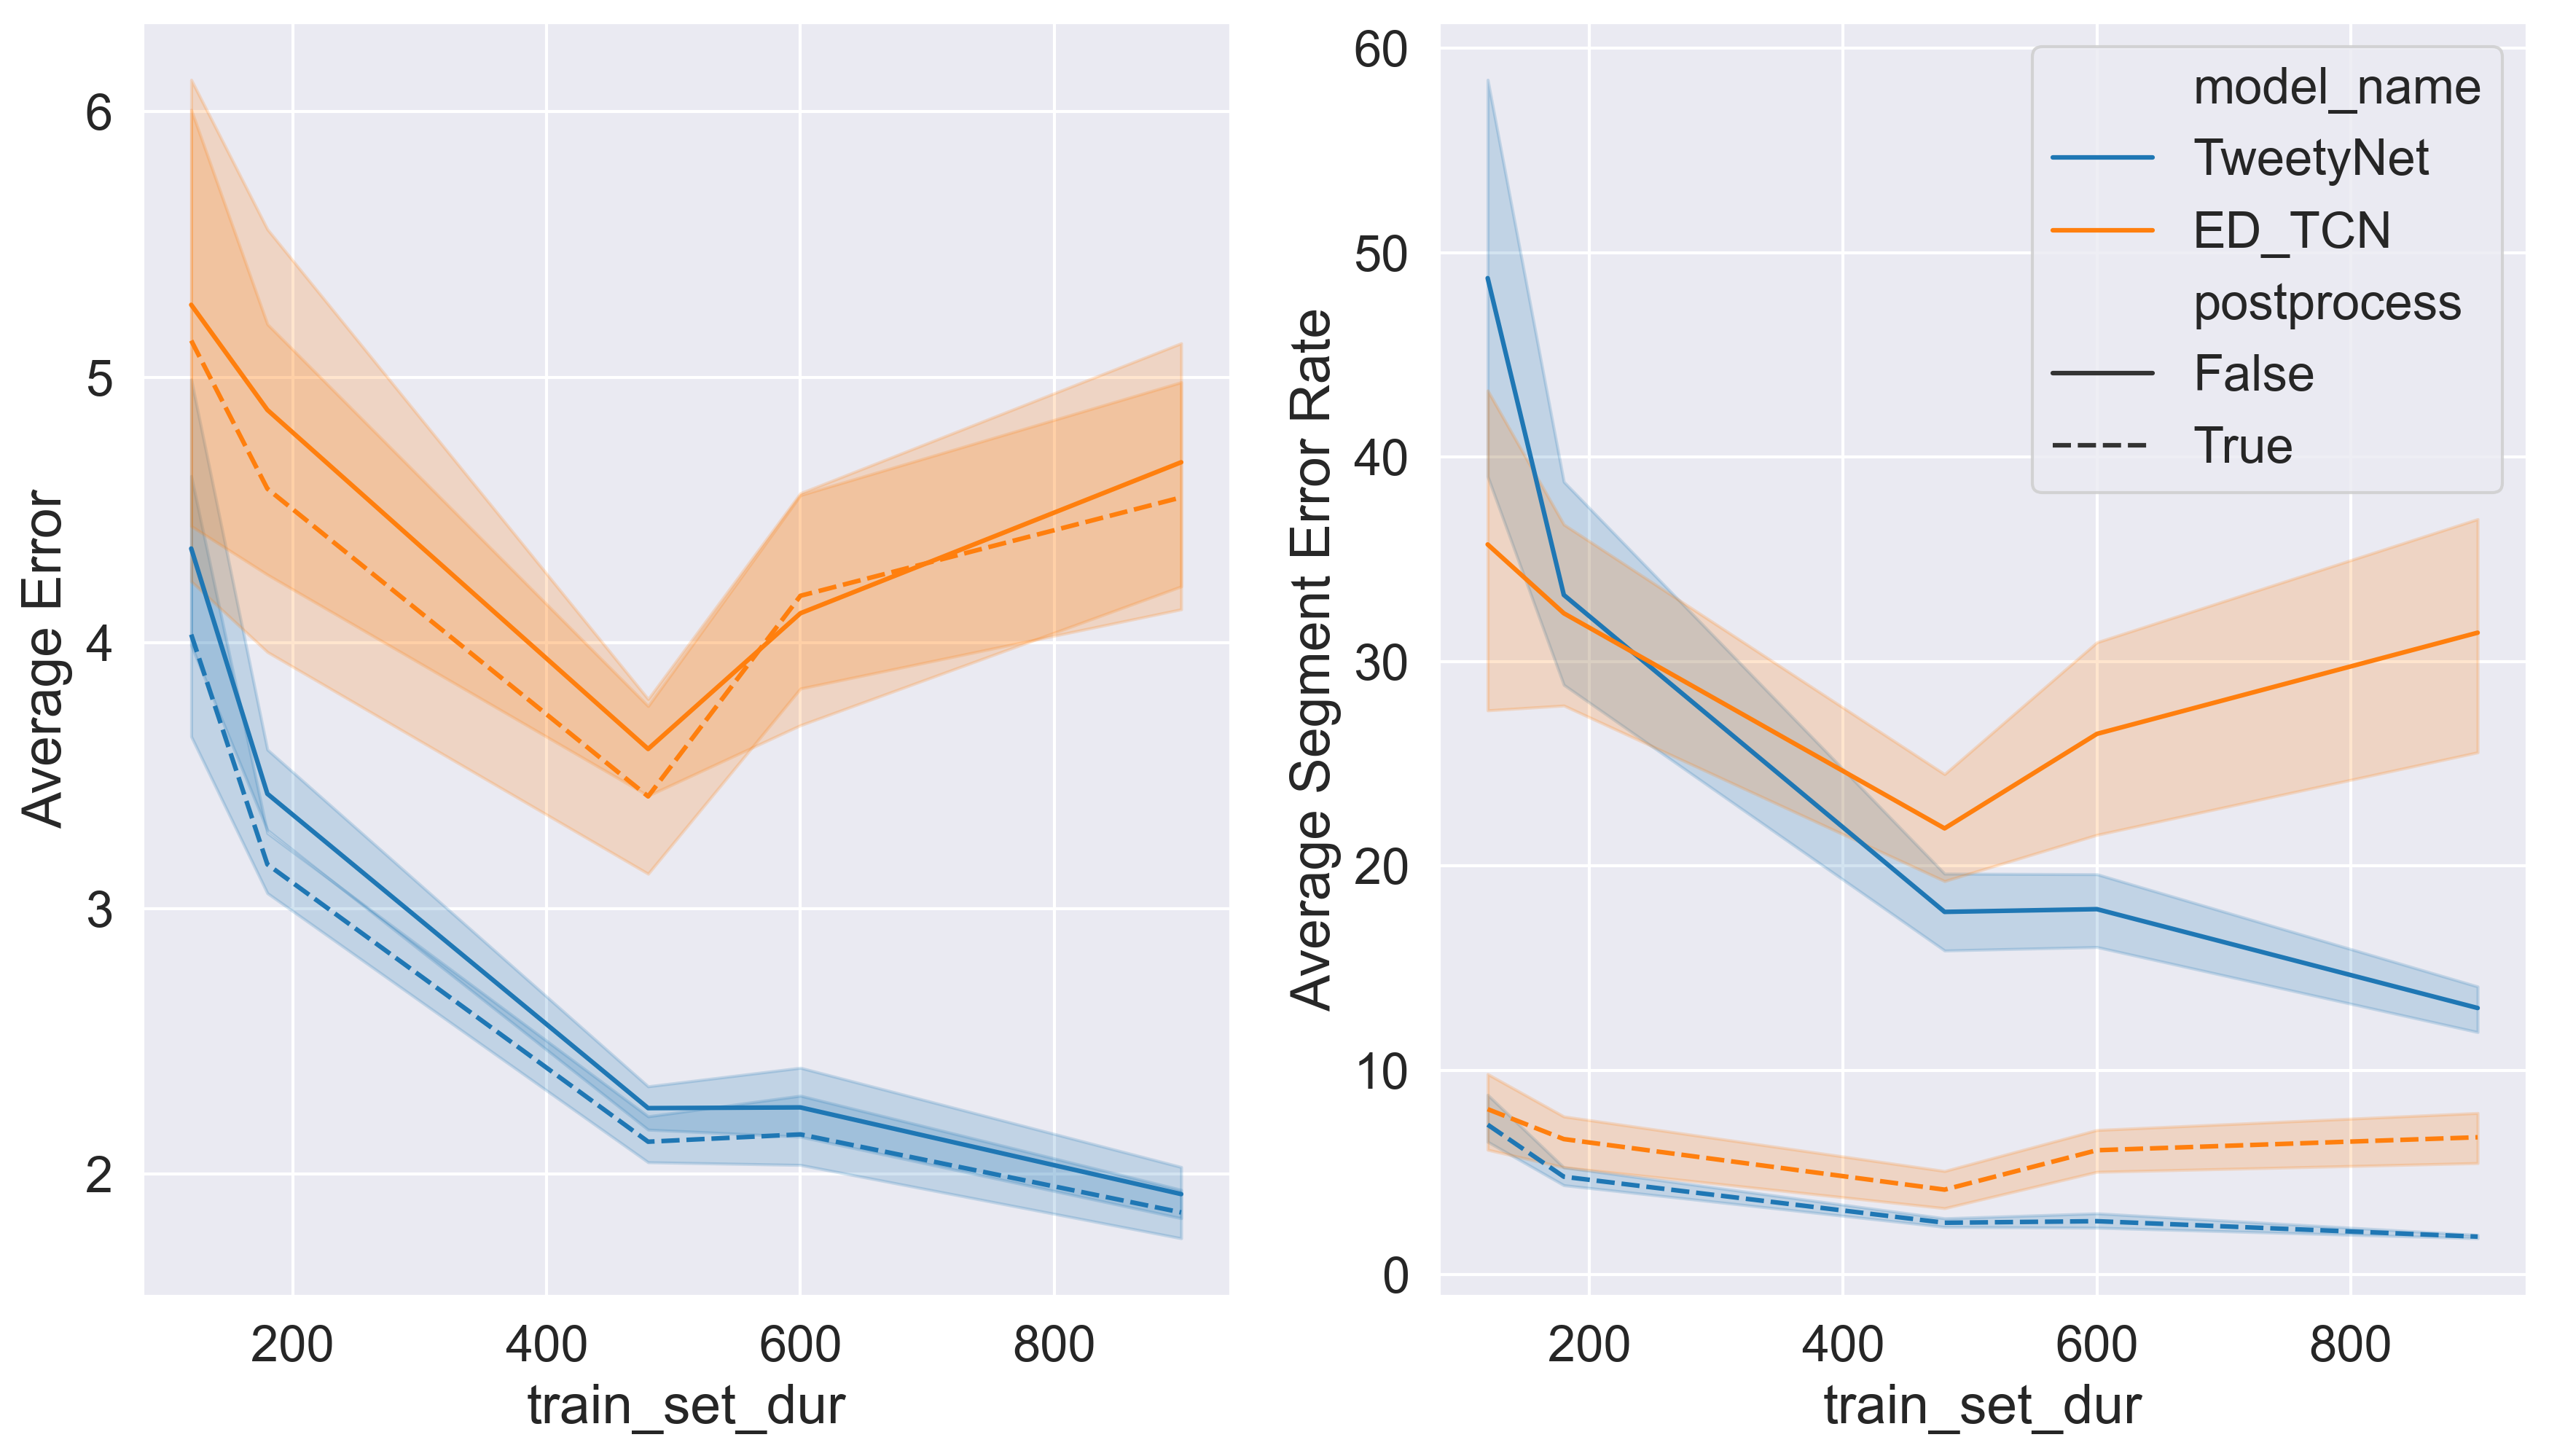

In [11]:
fig, ax_arr = plt.subplots(1, 2, figsize=(12, 7), dpi=300)

# data_postprocess = data[data.postprocess == True]

for ax_ind, err_name in enumerate(('Average Error', 'Average Segment Error Rate')):
    ax = ax_arr[ax_ind]    
    g = sns.lineplot(
        data=data,
        x='train_set_dur',
        y=err_name,
        style='postprocess',
        hue='model_name',
        palette='tab10',
        ax=ax,
    )
    if ax_ind == 1:
        sns.move_legend(ax, loc='upper right')
    else:
        ax.legend().remove()      
    
    # for ax_ind, ylim in enumerate(([0, 4], [0, 25])):
    #     ax_arr[ax_ind].set_ylim(ylim)
    
# fig.suptitle(f'{bird_id}')
fig.tight_layout()